# Dataset Analysis
In this notebook, we analyse properties of the "Don't Patronise Me!" dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/complete.csv")
display(df.head())

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


## Label Distribution
We explore the distribution of positive and negative samples within our dataset.


=== Distribution of labels ===
label
0    9476
1     993
Name: count, dtype: int64


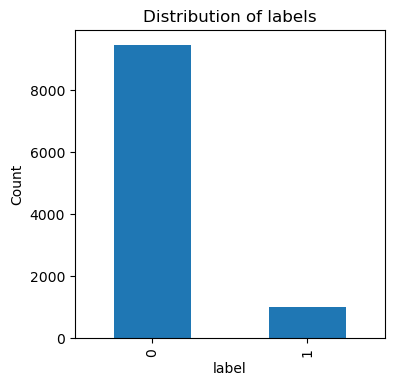

In [3]:
label_counts = df["label"].value_counts()
print("\n=== Distribution of labels ===")
print(label_counts)

# Plot a bar chart for numeric_label distribution
plt.figure(figsize=(4, 4))
label_counts.plot(kind='bar')
plt.title("Distribution of labels")
plt.xlabel("label")
plt.ylabel("Count")
plt.show()

We find that there is a large imbalance between positive and negative samples, within the dataset.

## Keyword
The keyword column represents the community that the patronizing or condescending language is targeted at.
We explore how the positive and negative samples within the dataset correlate with this keyword classification.

=== Class Distribution (Keyword) ===
keyword
migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: count, dtype: int64

=== Percentage Distribution (Keyword) ===
keyword
migrant          10.402140
in-need          10.335276
vulnerable       10.316172
homeless         10.287516
women            10.220651
refugee          10.201547
immigrant        10.134683
disabled          9.819467
hopeless          9.599771
poor-families     8.682778
Name: count, dtype: float64


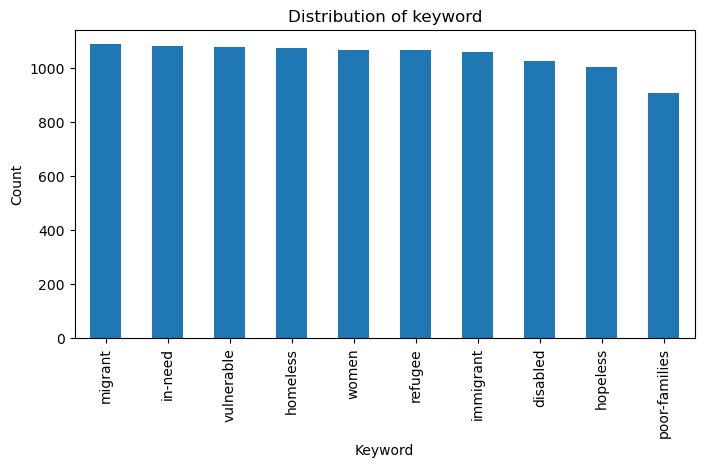

In [4]:
keyword_counts = df["keyword"].value_counts()
print("=== Class Distribution (Keyword) ===")
print(keyword_counts)

# Convert to percentages
keyword_percentages = keyword_counts / keyword_counts.sum() * 100
print("\n=== Percentage Distribution (Keyword) ===")
print(keyword_percentages)

# OPTIONAL: Plot a bar chart for the text_label distribution
plt.figure(figsize=(8, 4))
keyword_counts.plot(kind='bar')
plt.title("Distribution of keyword")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

First, we note that there is a roughly uniform distribution of keyword tags within the dataset.
This is desirable, as it allows us to effectively train our model on PCL in different contexts.

We now look for a correlation between this keyword classification and whether the sample has been flagged for PCL.

In [5]:
label_counts = df.groupby(["keyword", "label"]).size().unstack(fill_value=0)
print(label_counts)

label             0    1
keyword                 
disabled        947   81
homeless        899  178
hopeless        881  124
immigrant      1031   30
in-need         906  176
migrant        1053   36
poor-families   759  150
refugee         982   86
vulnerable     1000   80
women          1018   52


In [6]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['keyword'], df['label'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 322.75998365227304, p-value: 3.844608400569222e-64


The p-value of less than 0.05 is significant. We reject the null hypothesis.

In [7]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér’s V
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér’s V: {cramers_v_value}")

Cramér’s V: 0.17558493149510715


However, Cramer's V score is low.

## Text Length
Next we explore the text lengths of the samples, and look for correlation with the label.

count    10469.000000
mean        48.422581
std         29.091174
min          1.000000
25%         30.000000
50%         42.000000
75%         60.000000
max        909.000000
Name: text_length, dtype: float64
=== Text Length Statistics by text_label ===
        count       mean        std  min   25%   50%   75%    max
label                                                            
0      9476.0  47.877902  28.624509  1.0  30.0  42.0  59.0  909.0
1       993.0  53.620342  32.779995  6.0  33.0  47.0  67.0  512.0


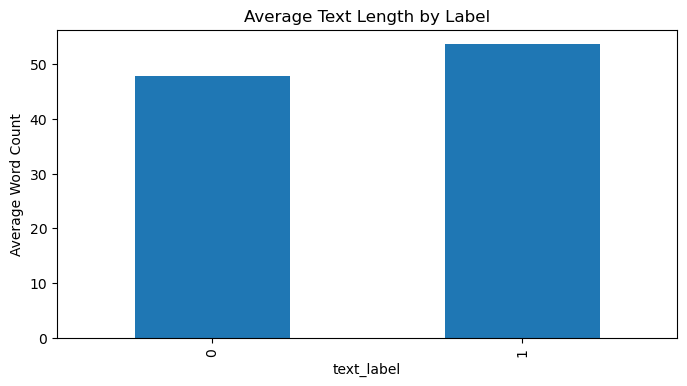

In [8]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))  # word count
# Alternatively: len(str(x)) for raw character count

print(df["text_length"].describe())

# Now, compute average text length by 'text_label':
length_by_label = df.groupby("label")["text_length"].describe()
print("=== Text Length Statistics by text_label ===")
print(length_by_label)

# OPTIONAL: Visualize average text length by text_label
avg_length = df.groupby("label")["text_length"].mean()
plt.figure(figsize=(8, 4))
avg_length.plot(kind='bar')
plt.title("Average Text Length by Label")
plt.xlabel("text_label")
plt.ylabel("Average Word Count")
plt.show()

## Qualitative Analysis
Finally, we draw random samples from both positive and negative classes, to qualitatively look at the difficulty of the task.

In [9]:
def show_random_examples(df, label_col, n=5):
    unique_labels = df[label_col].unique()
    for lbl in unique_labels:
        subset = df[df[label_col] == lbl]
        if len(subset) > 0:
            print(f"\n=== Examples for label: '{lbl}' ===")
            samples = subset.sample(min(n, len(subset)))[["keyword", "text", "label"]]
            for sample in samples['text']:
                print(sample)
                print()

show_random_examples(df, "label", n=10)


=== Examples for label: '0' ===
" We going to have to make sure that the social chasm between Goodwin Park and Campion College is bridged , " he declared . " So many of our children from the inner city who do very well and go there experience hopeless social problems . "

More than once , a mentally ill homeless person showed up at the front door of the building , insisting that they either lived there or wanted to rent an apartment . The historic district of Rockville was a " nice " part of town in which you almost never saw people living on the street , so it was even stranger .

Setting a hard-line tone on national security , President Donald Trump on Friday suspended the nation 's refugee program for four months , aiming to keep " radical Islamic terrorists " out of the United States .

" What rights holders can request be removed or disabled depends on the nature of the illegal content posted . It can vary from specific content within web pages , such as videos or logos , or on r